# LBG Data Science Task

## Steps
- Inspect Data
    - Basic inspection of data
    - Provide Profiles for interactive evaluation
    - Investigate unique identifier and join
    - Duplicates, distributions, nulls etc
    - Provide profile of combined data
- Variable Creation
    - Assess existing variables
    - create new ones
- Modelling
    - Review benchmark model
    - Model 1
    - Model 2
    - Key Lessons for productionising

In [1]:
# hardcode the filenames
csv_campaign = "../Assignment/Campaign.csv"
csv_mortgage = "../Assignment/Mortgage.csv"

In [2]:
# Load necessary packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as prof


In [3]:
# Try loading the files as dataframes
try:
    df_campaigns = pd.read_csv(csv_campaign)
    df_mortgage = pd.read_csv(csv_mortgage)
except FileNotFoundError:
    print("Check the filepath for these two files % - %"%(csv_campaign, csv_mortgage))
    

## Campaigns Dataset

In [4]:
# Inspect head of the campaigns df
df_campaigns.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No


In [5]:
# Print the distribution of each variable
df_campaigns.describe()

,participant_id,age,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance
count,3.206000e+04,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000
mean,4.973681e+12,38.564816,7.757673,13.207611,5.290331,5.170930,0.424891
std,2.883537e+12,13.637532,3.859709,3.353797,2.673795,2.550475,0.494334
min,8.859368e+07,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.493678e+12,28.000000,5.000000,12.000000,3.000000,3.000000,0.000000
50%,4.962955e+12,37.000000,8.000000,13.000000,5.000000,5.000000,0.000000
75%,7.470135e+12,48.000000,10.000000,16.000000,8.000000,7.000000,1.000000
max,9.999820e+12,90.000000,20.000000,21.000000,10.000000,10.000000,1.000000


In [6]:
# Clarity on the size/shape
df_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant_id        32060 non-null  float64
 1   name_title            19859 non-null  object 
 2   first_name            32060 non-null  object 
 3   last_name             32060 non-null  object 
 4   age                   32060 non-null  int64  
 5   postcode              32060 non-null  object 
 6   marital_status        32060 non-null  object 
 7   education             32060 non-null  object 
 8   job_title             32060 non-null  object 
 9   occupation_level      32060 non-null  int64  
 10  education_num         32060 non-null  int64  
 11  familiarity_FB        32060 non-null  int64  
 12  view_FB               32060 non-null  int64  
 13  interested_insurance  32060 non-null  int64  
 14  company_email         32060 non-null  object 
 15  created_account    

### Immediate findings
- Reasonable data set size for profiling
- Mixed datatypes
- ~32k instances
- No clear unique identifier - possibly participant_id?
- create_account (/target) - contains NaNs


In [7]:
# Inspect participant_id closer
df_campaigns.participant_id.astype('str').describe()
## not unique

count               32060
unique              31639
top       6843680000000.0
freq                    3
Name: participant_id, dtype: object

In [8]:
# Inspect participant_id
df_participant = df_campaigns.participant_id.astype('int').astype('str').value_counts()

# whats the frequency of duplicates
print(df_participant.value_counts())

# show the top 5 duplicates
print(df_participant.iloc[df_participant.values>1].head())
## Many duplicates, assess one

1    31222
2      413
3        4
Name: participant_id, dtype: int64
5077250000000    3
5021790000000    3
6843680000000    3
3648980000000    3
7303290000000    2
Name: participant_id, dtype: int64


In [9]:
# Whats the status of these duplicates
df_campaigns.loc[df_campaigns.participant_id.astype('int').astype('str')=='5077250000000', :]
## Duplicate participant_id, but not unique on customer!

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
2243,5.077250e+12,NaN,Douglas,Davies,45,SN4 5PS,Married-civ-spouse,Assoc-acdm,Dispensing optician,15,16,5,10,0,jonesleigh@stanley-kemp.org,No
18650,5.077250e+12,Mr.,Timothy,Stone,23,EH3 4TT,Never-married,Bachelors,Firefighter,1,17,1,3,0,btaylor@slater.biz,NaN
27311,5.077250e+12,NaN,Stewart,McDonald,49,BS3V 5PR,Married-civ-spouse,7th-8th,"Designer, blown glass/stained glass",5,5,2,5,0,csimmons@abbott.com,NaN


In [10]:
# Whats the split of account creations for the previous campaign
df_campaigns.created_account.value_counts()

No     2787
Yes     240
Name: created_account, dtype: int64

In [11]:
## Target has a class imbalanced
print("Class imbalance of 'created_account':%.2f percent"%(240/ (240+2787)*100))

Class imbalance of 'created_account':7.93 percent


In [12]:
# inspect those who have nan values for create_account field
df_campaigns.loc[~df_campaigns.created_account.isna()].head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No


## Mortgage Dataset

In [13]:
# Inspect head of the mortgage df
df_mortgage.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


In [14]:
# Print the distribution of each numerical variable
df_mortgage.describe()

,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,demographic_characteristic
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04
mean,5.170326,5.519425,40.437456,1077.648844,87.303830,1.897784e+05
std,6.437202,3.466831,12.347429,7385.292085,402.960219,1.055500e+05
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.228500e+04
25%,1.000000,2.000000,40.000000,0.000000,0.000000,1.178270e+05
50%,3.000000,6.000000,40.000000,0.000000,0.000000,1.783560e+05
75%,7.000000,9.000000,45.000000,0.000000,0.000000,2.370510e+05
max,57.000000,11.000000,99.000000,99999.000000,4356.000000,1.484705e+06


In [15]:
# Whats the shape
df_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   full_name                   32561 non-null  object
 1   dob                         32561 non-null  object
 2   town                        32561 non-null  object
 3   paye                        32561 non-null  object
 4   salary_band                 32561 non-null  object
 5   years_with_employer         32561 non-null  int64 
 6   months_with_employer        32561 non-null  int64 
 7   hours_per_week              32561 non-null  int64 
 8   capital_gain                32561 non-null  int64 
 9   capital_loss                32561 non-null  int64 
 10  new_mortgage                32561 non-null  object
 11  sex                         32561 non-null  object
 12  religion                    32561 non-null  object
 13  relationship                32561 non-null  ob

### Immediate findings
- Reasonable data set size for profiling
- More instances than in df_campaign, with 32561 rather than 32060
- No unique id for joining either - possible combination on age/dob, full_name/last_name and town/postcode

## Generate Profile Reports

### Campaign Report

In [16]:
# create the prof report
profile_campaign = prof.ProfileReport(df_campaigns, title="Campaign Profiling Report", explorative=True)

In [17]:
# review the report via widgets
#profile_campaign.to_widgets()

In-depth Findings
- participant_id
    - duplicate numbers, but not on customer
- age
    - USE: as is
- postcode
    - USE: new_feature: possible combination with external sources
- marital_status
    - USE: as is, or new combination
- education
    - USE: new_feature: top_x_else
- job_title
    - High cardinality
    - USE: new_feature: top_x_else
- occupation_level
    - level of seniority within business, assume ordered values
    - USE: as is/ categorical
- education_num
    - 1-21: years in education
    - USE: as is
- familiarity_FB
    - 1-10
    - USE: as is
- view_FB
    - 1-10
    - USE: as is
- interested_insurance
    - binary flag
    - USE: as is
- company_email
    - High cardinality
    - USE: new_feat: find popular work email addresses
- created_account
    - Has 29033 (90.6%) missing values
    - Assumed 9.4% are those randomly sample used for prior test. Remainder are for testing.
    - USE: as target

In [18]:
## GENERIC FUNCTIONS

def top_x_by_count(series, k_value, filler):
    top_fields = list(series.value_counts().index[0: k_value].values)
    series.loc[~series.isin(top_fields)] = filler
    return series


### Variable Handling

##### Variable inspect: marital_status

In [19]:
df_campaigns['has_married'] = np.where(df_campaigns.marital_status.isin(['Divorced', 'Never-married']), 0, 1)
df_campaigns[['has_married','marital_status']].value_counts()
## appears to correctly classify as has_married

has_married  marital_status       
1            Married-civ-spouse       14747
0            Never-married            10531
             Divorced                  4365
1            Separated                 1007
             Widowed                    976
             Married-spouse-absent      411
             Married-AF-spouse           23
dtype: int64

##### Variable inspect: education

In [20]:
education_mapping = {'Preschool':1,
                     '1st-4th':2,
                    '5th-6th':3,
                    '7th-8th':4,
                    '9th':5,
                    '10th':6,
                    '11th':7,
                    '12th':8,
                    'HS-grad':9,
                    'Some-college':10,
                    'Bachelors':11,
                    'Masters':12,
                    'Doctorate':13,
                    'Assoc-voc':14,
                    'Assoc-acdm':15,
                    'Prof-school':16}

df_campaigns.education.value_counts()[0:5]

HS-grad         10347
Some-college     7190
Bachelors        5278
Masters          1693
Assoc-voc        1357
Name: education, dtype: int64

In [21]:
# new feature with ordered number from category
df_campaigns['education_order'] = df_campaigns.education.map(education_mapping)

#### Inspect Variable: job_title

In [22]:
# new feature for most popular job titles
df_campaigns['job_title_top_10'] = top_x_by_count(df_campaigns.job_title.copy(), 10, 'Other')
df_campaigns['job_title_top_10'].value_counts()

Other                                27900
Accountant, chartered                  484
Engineer, manufacturing                481
Amenity horticulturist                 462
Tutor                                  456
Education officer, community           443
Environmental health practitioner      436
Event organiser                        421
Conservator, museum/gallery            329
Clinical psychologist                  325
Teaching Associate                     323
Name: job_title_top_10, dtype: int64

#### Inspect Variable: occupation_level

In [23]:
# potentially use as is
df_campaigns.occupation_level.value_counts()[0:5]

8     3687
6     3485
10    3172
4     2698
7     2388
Name: occupation_level, dtype: int64

#### Inspect Variable: company_email

In [24]:
# new feature for most popular company email addresses
df_campaigns['company_email_address'] = \
    top_x_by_count(df_campaigns.company_email.str.split('@',expand=True)[1], 10, 'Other')
df_campaigns['company_email_address'].value_counts()

Other           30182
smith.com         379
jones.com         309
williams.com      206
brown.com         176
taylor.com        163
davies.com        163
evans.com         137
wilson.com        122
johnson.com       112
roberts.com       111
Name: company_email_address, dtype: int64

### Mortage Report

In [25]:
# Generate profile of mortgage data
profile_mortgage = prof.ProfileReport(df_mortgage, title="Mortage Profiling Report", explorative=True)

In [26]:
#profile_mortgage.to_widgets()

### In-depth Findings
- town
    - 2649 unique 'town' values. Majority in 5 Cities.
    - USE: new feat: top_x_else
- paye
    - high cardinality, approx 5k (~18%) from 3 employers
    - USE: new feat: top_x_else
- salary_band
    - Needs to be converted to a consistent numerical datatype
    - USE: new_feat: clean existing
- years_with_employer
    - some 0s
    - USE: new_feat: combine years and months 
- months_with_employer
    - 0-12
    - USE: new_feat: as above
- capital_gain
    - 91.7% 0s
    - 0-100k
    - USE: as is
- capital_loss
    - 95.3% 0s
    - 0-4356
    - USE: as is
- new_mortgage
    - all true, redundant info
    - USE: no
- sex
    - male/female, no nans
    - USE: ignore due to ethical reasons
- religion
    - mix categorical, no nans.
    - USE: ignore due to ethical reasons
- race
    - mix categorical, no nans.
    - USE: ignore due to ethical reasons
- native_country
    - mix categorical, no nans.
    - USE: ignore due to ethical reasons
- workclass:
    - mix categorical, no nans
    - USE: review possible combinations
- demographic_characteristic
    - numerical, need to convert to string/category
    - USE: possible combination of previous, review

#### Inspect Variable: town

In [27]:
# replace long tail 
df_mortgage['town_adj'] = top_x_by_count(df_mortgage.town.copy(), 5, 'Other')
df_mortgage['town_adj'].value_counts()

Edinburgh    19523
Swindon       5258
Other         3798
Leeds         1529
Oxford        1422
Bristol       1031
Name: town_adj, dtype: int64

#### Inspect Variable: paye

In [28]:
# possible feature option - 3 large employers
df_mortgage['paye_adj'] = top_x_by_count(df_mortgage.paye.copy(), 3, 'Other')
df_mortgage['paye_adj'].value_counts()

Other       27011
NW384000     3307
BR442000     1434
EE913000      809
Name: paye_adj, dtype: int64

#### Investigate variable: salary_band

In [29]:
def convert_salary_band_to_numeric(sband: pd.Series):
    # get base value
    sband['number_value'] = sband.salary_band.str.extract('(\d+)').astype('float')
    # obtain midpoint from ranged values
    mix_range = \
    sband.loc[sband.salary_band.str.contains('range')].salary_band.str.extractall('(\d+)').astype('float')
    range_midpoint = (mix_range[0].reset_index().pivot(index='level_0',columns=['match'])[0][0] + \
                      mix_range[0].reset_index().pivot(index='level_0',columns=['match'])[0][1]) / 2
    # update range, weekly and monthly payments
    sband.loc[sband.salary_band.str.contains('range'),'number_value'] = range_midpoint
    sband.loc[sband.salary_band.str.contains('pw'),'number_value'] *= 52
    sband.loc[sband.salary_band.str.contains('month'),'number_value'] *= 12
    return sband.number_value.values

In [30]:
# we need to tidy up the salary, but inspect first
df_salary = df_mortgage.loc[:,['salary_band']].copy()
# focus on annual conversion, ignore potential currency types for now.
df_salary['text'] = df_salary.salary_band.str.replace('(\d+)','', regex=True)
df_salary.text.value_counts()


£ yearly        13003
£. per month     6485
£ -  range       5055
£. pw            4783
.BSD               30
                ...  
LSK                 1
USDT                1
NEO                 1
SRN                 1
ADA                 1
Name: text, Length: 208, dtype: int64

In [31]:

def tidy_salary_band_text(series: pd.Series):
    valid_options = ['weekly', 'monthly', 'range', 'yearly']
    series.loc[series.str.contains('pw')] = 'weekly'
    series.loc[series.str.contains('per month')] = 'monthly'
    series.loc[series.str.contains('range')] = 'range'
    series.loc[series.str.contains('yearly')] = 'yearly'
    series.loc[~series.isin(valid_options)] = 'foreign_ccy'
    return series

tidy_salary_band_text(df_salary.text).value_counts()

yearly         13003
monthly         6485
range           5055
weekly          4783
foreign_ccy     3235
Name: text, dtype: int64

In [32]:
# tidy the salary variable to an annual payment
df_mortgage['annual_salary'] = convert_salary_band_to_numeric( df_mortgage.loc[:,['salary_band']].copy())

df_mortgage['salary_band_text'] = df_mortgage.salary_band.str.replace('(\d+)','', regex=True)
df_mortgage.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,religion,relationship,race,native_country,workclass,demographic_characteristic,town_adj,paye_adj,annual_salary,salary_band_text
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,...,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,Edinburgh,Other,18109.0,£ yearly
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,...,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,Leeds,Other,16945.0,£ yearly
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,...,Christianity,Not-in-family,White,United Kingdom,Private,215646,Edinburgh,Other,37908.0,£. pw
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,...,Christianity,Husband,Black,United Kingdom,Private,234721,Edinburgh,Other,19087.0,£ yearly
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,...,Christianity,Wife,Black,Sweden,Private,338409,Swindon,BR442000,32892.0,£. per month


In [33]:
# update and remove the long tail or foreign currencies
df_mortgage['salary_band_text_adj'] = top_x_by_count(df_mortgage['salary_band_text'].copy(), 5, 'foreign_ccy')

<AxesSubplot:>

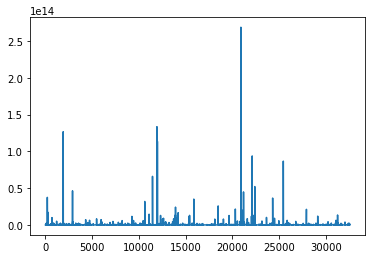

In [34]:
df_mortgage.annual_salary.plot()

In [35]:
# whats the distribution of this field
df_mortgage.annual_salary.describe()
## far too high extreme values

count    3.246300e+04
mean     6.146677e+10
std      2.208109e+12
min      3.600000e+01
25%      1.919900e+04
50%      2.402350e+04
75%      3.661775e+04
max      2.685770e+14
Name: annual_salary, dtype: float64

In [36]:
# what are the bounds of reality here
lower_bound, upper_bound = df_mortgage.annual_salary.quantile([0.025, 0.975])

In [37]:
# cleaning needed for the upper boundaries?
df_mortgage.loc[df_mortgage.annual_salary>upper_bound, \
                ['salary_band', 'salary_band_text', 'annual_salary', 'salary_band_text_adj']]
## can see that some foreign currencies have larger than anticipated annual salaries

,salary_band,salary_band_text,annual_salary,salary_band_text_adj
60,7501285726.65BGN,.BGN,7.501286e+09,foreign_ccy
66,1908801634263.09NIO,.NIO,1.908802e+12,foreign_ccy
111,96998481409.26BIF,.BIF,9.699848e+10,foreign_ccy
131,16526239844.06GGP,.GGP,1.652624e+10,foreign_ccy
136,2994576062137.88MZN,.MZN,2.994576e+12,foreign_ccy
...,...,...,...,...
32469,2494222547548.97XCD,.XCD,2.494223e+12,foreign_ccy
32485,50068589159.49MDL,.MDL,5.006859e+10,foreign_ccy
32495,11916566869.89MDL,.MDL,1.191657e+10,foreign_ccy
32533,1833798921226.91GBP,.GBP,1.833799e+12,foreign_ccy


In [38]:
# cleaning needed for the lower boundaries?
df_mortgage.loc[df_mortgage.annual_salary<lower_bound,['salary_band', 'salary_band_text', 'annual_salary']]
## appears realistic and not specific to foreign ccy

,salary_band,salary_band_text,annual_salary
75,£13040 yearly,£ yearly,13040.0
175,£14481 yearly,£ yearly,14481.0
177,£13686 yearly,£ yearly,13686.0
216,£267.04 pw,£. pw,13884.0
249,£1156.5 per month,£. per month,13872.0
...,...,...,...
32351,£13284 yearly,£ yearly,13284.0
32379,106.52IMP,.IMP,106.0
32391,£13686 yearly,£ yearly,13686.0
32408,£13861 yearly,£ yearly,13861.0


In [39]:
# annual_salary empty fields
df_mortgage.loc[df_mortgage.annual_salary.isna(), \
                ['salary_band', 'salary_band_text', 'annual_salary','salary_band_text_adj']]
## some errors in salary band, appear to be specific to foreign ccys

,salary_band,salary_band_text,annual_salary,salary_band_text_adj
113,BC,BC,NaN,foreign_ccy
363,BCH,BCH,NaN,foreign_ccy
575,XDN,XDN,NaN,foreign_ccy
686,EOS,EOS,NaN,foreign_ccy
715,XDN,XDN,NaN,foreign_ccy
...,...,...,...,...
30319,POT,POT,NaN,foreign_ccy
30324,BC,BC,NaN,foreign_ccy
30347,TIT,TIT,NaN,foreign_ccy
31160,BTC,BTC,NaN,foreign_ccy


In [40]:
# cap the upper limit at the 97.5 percentile
df_mortgage.loc[df_mortgage.annual_salary > upper_bound,['annual_salary']] = upper_bound

In [41]:
# impute the NULL fields for annual_salarh where it is a foreign ccy
impute_salary_missing_foreign_value = \
                df_mortgage.loc[df_mortgage.salary_band_text_adj == 'foreign_ccy','annual_salary'].median()
print(impute_salary_missing_foreign_value)

82273854.0


In [42]:
# fill the NULLs with the median foreign ccy value
df_mortgage.loc[df_mortgage.salary_band_text_adj == 'foreign_ccy','annual_salary'] = \
df_mortgage.loc[df_mortgage.salary_band_text_adj == 'foreign_ccy',].annual_salary.\
    fillna(impute_salary_missing_foreign_value).values

In [43]:
# check for nans
df_mortgage.annual_salary.isna().sum()

0

#### Investigate variable: years/months_at_employer

In [44]:
# combine to have total months at employer
df_mortgage['total_months_with_employer'] = \
    df_mortgage['years_with_employer']*12 + df_mortgage['months_with_employer']
df_mortgage['total_months_with_employer'].describe()
# Min: no negatives
# Max: 695/12 = 57.9 years, realistic.

count    32561.000000
mean        67.563343
std         77.341747
min          0.000000
25%         16.000000
50%         38.000000
75%         92.000000
max        695.000000
Name: total_months_with_employer, dtype: float64

#### Investigate variable: workclass

In [45]:
# inspect cardinality
print("Unique fields: %s"%(df_mortgage.workclass.astype('str').nunique()))
df_mortgage.workclass.astype('str').value_counts()

Unique fields: 9


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [46]:
# Check the Federal-gov field for location/ native_country
df_mortgage.loc[df_mortgage['workclass']=='Federal-gov',:].head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,race,native_country,workclass,demographic_characteristic,town_adj,paye_adj,annual_salary,salary_band_text,salary_band_text_adj,total_months_with_employer
22,Bryan Shaun Barry,1982-08-28,Edinburgh,36215126,£3386.19 per month,9,1,40,0,0,...,Black,United Kingdom,Federal-gov,76845,Edinburgh,Other,40632.0,£. per month,£. per month,109
33,Ricky Mitchell,1987-04-07,Leeds,27798850,£1456.76 per month,2,8,40,0,0,...,White,United Kingdom,Federal-gov,59951,Leeds,Other,17472.0,£. per month,£. per month,32
45,Mr. Garry Wilson,1960-04-02,Swindon,NW384000,£1305.9 pw,5,9,40,0,0,...,Black,United Kingdom,Federal-gov,337895,Swindon,NW384000,67860.0,£. pw,£. pw,69
53,Martin Bryant,1967-10-29,Swindon,NW384000,£16542 - 29983 range,21,11,55,0,0,...,White,United Kingdom,Federal-gov,251585,Swindon,NW384000,23262.5,£ - range,£ - range,263
89,Mathew Ingram,1975-11-29,Turnerstad,98877522,£362.95 pw,9,3,50,0,0,...,White,United Kingdom,Federal-gov,410867,Other,Other,18824.0,£. pw,£. pw,111


In [47]:
def tidy_workclass(series):
    series.loc[series.str.contains('-gov')]='public'
    series.loc[series.str.contains('-emp')]='self-emp'
    series.loc[series.str.contains('\?')]='unknown'
    series.loc[series.str.contains('Private')]='private'
    series.loc[series.str.contains('Without')]='wo-pay'
    series.loc[series.str.contains('Never')]='never'
    return series

df_mortgage['workclass_adj'] = tidy_workclass(df_mortgage.workclass.copy())
df_mortgage['workclass_adj'].value_counts()

private     22696
public       4351
self-emp     3657
unknown      1836
wo-pay         14
never           7
Name: workclass_adj, dtype: int64

#### Investigate variable: demographic_characteristic

In [48]:
# inspect cardinality
print("Unique fields: %s"%(df_mortgage.demographic_characteristic.astype('str').nunique()))
df_mortgage.demographic_characteristic.astype('str').value_counts()
## states that similar values exhibit similar characteristics - leave as is

Unique fields: 21648


203488    13
123011    13
164190    13
148995    12
121124    12
          ..
205949     1
196725     1
148900     1
225859     1
186611     1
Name: demographic_characteristic, Length: 21648, dtype: int64

In [49]:
# view the most popular
df_mortgage.loc[df_mortgage['demographic_characteristic']==203488,:].head(n=3)
## not specific to location

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,native_country,workclass,demographic_characteristic,town_adj,paye_adj,annual_salary,salary_band_text,salary_band_text_adj,total_months_with_employer,workclass_adj
3464,Liam Field,1986-04-01,Swindon,NW384000,£16417 - 29755 range,6,1,50,7298,0,...,United Kingdom,Private,203488,Swindon,NW384000,23086.0,£ - range,£ - range,73,private
9023,Mr. John Whitehead,1987-11-05,Lake Hollyshire,74016976,£495.21 pw,9,1,40,0,0,...,United Kingdom,Private,203488,Other,Other,25740.0,£. pw,£. pw,109,private
10383,Benjamin Iain Howard,1984-04-10,Edinburgh,46314970,£2078.37 per month,1,10,40,0,0,...,United Kingdom,Private,203488,Edinburgh,Other,24936.0,£. per month,£. per month,22,private


## Next Steps
- Review possible unique identifiers between dataframes 
    - Identify a reliable postcode-to-region mapper
    - Calculate age from DoB
    - Extract lastname from name fields
    - Combine to create unique key
- Merge datasets
- Inspect relationships and consider further analysis

### Obtain Age from DoB

In [50]:
# Assume the mortgage database is accurate as at current date
## But calculate the age of customer 6 months ago at previous campaign

todays_date = pd.Timestamp('2021-11-20')
prev_campaign_date = todays_date-pd.Timedelta(days=180)

def calc_age(fixed_date: pd.Timestamp, date_series: pd.Series):
    return ((prev_campaign_date - date_series)/ np.timedelta64(365, 'D')).astype('int')

# convert dob to datetime format
df_mortgage['dob'] = pd.to_datetime(df_mortgage['dob'])
df_mortgage['age_calc'] = calc_age(prev_campaign_date, df_mortgage.dob)
df_mortgage.age_calc.head()

0    42
1    52
2    42
3    55
4    31
Name: age_calc, dtype: int64

In [51]:
# are the final 5 the same in campaign as in mortgage
df_mortgage.iloc[0:df_campaigns.shape[0],:3].tail()

,full_name,dob,town
32055,Trevor Rowe,1983-07-17,Edinburgh
32056,Benjamin Williams,1965-12-08,Edinburgh
32057,Mr. Frank Saunders,1974-04-27,Swindon
32058,Raymond Dunn,1958-10-08,Edinburgh
32059,Mr. Aaron Edwards,1962-08-25,Swindon


In [52]:
df_campaigns.iloc[:,1:6].tail()

,name_title,first_name,last_name,age,postcode
32055,NaN,Trevor,Rowe,34,EH11 9AD
32056,Mrs.,Benjamin,Williams,53,EH73 3RY
32057,Mr.,Frank,Saunders,44,SN94 0DX
32058,NaN,Raymond,Dunn,60,EH95 7NN
32059,Mr.,Aaron,Edwards,55,SN3N 0BU


In [53]:
# add a last_name field to df_mortgage for comparison purposes
df_mortgage['last_name'] = df_mortgage.full_name.str.rsplit(' ', n=1, expand=True)[1]

In [54]:
# add a first_name field to df_mortgage for comparison purposes
df_mortgage_names = df_mortgage.full_name.str.rsplit(' ', n=3, expand=True)
df_mortgage_names['initial'] = df_mortgage_names[0].isin(['Mr.', 'Miss.', 'Mrs.', 'Dr.', 'Ms.', 'Miss'])
first_names = [df_mortgage_names.iloc[itm,1] if val==True else df_mortgage_names.iloc[itm,0]\
       for itm, val in enumerate(df_mortgage_names.initial)]
df_mortgage['first_name'] = first_names

### Combine Datasets

In [55]:
# filter out additional customers
df_mortgage_sub = df_mortgage.iloc[0:df_campaigns.shape[0],:].copy()
df_mortgage_sub.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,town_adj,paye_adj,annual_salary,salary_band_text,salary_band_text_adj,total_months_with_employer,workclass_adj,age_calc,last_name,first_name
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,...,Edinburgh,Other,18109.0,£ yearly,£ yearly,246,public,42,Coles,Dale
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,...,Leeds,Other,16945.0,£ yearly,£ yearly,337,self-emp,52,Allen,Joel
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,...,Edinburgh,Other,37908.0,£. pw,£. pw,173,private,42,Davis,Craig
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,...,Edinburgh,Other,19087.0,£ yearly,£ yearly,390,private,55,Thornton,Brandon
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,...,Swindon,BR442000,32892.0,£. per month,£. per month,42,private,31,Fletcher,Brett


In [56]:
# combine both data sets
df_combined = pd.merge(df_campaigns, df_mortgage_sub, left_index=True, right_index=True)
print(df_combined.shape)
df_combined.head()

(32060, 48)


,participant_id,name_title,first_name_x,last_name_x,age,postcode,marital_status,education,job_title,occupation_level,...,town_adj,paye_adj,annual_salary,salary_band_text,salary_band_text_adj,total_months_with_employer,workclass_adj,age_calc,last_name_y,first_name_y
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,...,Edinburgh,Other,18109.0,£ yearly,£ yearly,246,public,42,Coles,Dale
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,...,Leeds,Other,16945.0,£ yearly,£ yearly,337,self-emp,52,Allen,Joel
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,...,Edinburgh,Other,37908.0,£. pw,£. pw,173,private,42,Davis,Craig
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,...,Edinburgh,Other,19087.0,£ yearly,£ yearly,390,private,55,Thornton,Brandon
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,...,Swindon,BR442000,32892.0,£. per month,£. per month,42,private,31,Fletcher,Brett


In [57]:
df_mortgage_sub.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,town_adj,paye_adj,annual_salary,salary_band_text,salary_band_text_adj,total_months_with_employer,workclass_adj,age_calc,last_name,first_name
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,...,Edinburgh,Other,18109.0,£ yearly,£ yearly,246,public,42,Coles,Dale
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,...,Leeds,Other,16945.0,£ yearly,£ yearly,337,self-emp,52,Allen,Joel
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,...,Edinburgh,Other,37908.0,£. pw,£. pw,173,private,42,Davis,Craig
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,...,Edinburgh,Other,19087.0,£ yearly,£ yearly,390,private,55,Thornton,Brandon
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,...,Swindon,BR442000,32892.0,£. per month,£. per month,42,private,31,Fletcher,Brett


In [58]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   participant_id              32060 non-null  float64       
 1   name_title                  19859 non-null  object        
 2   first_name_x                32060 non-null  object        
 3   last_name_x                 32060 non-null  object        
 4   age                         32060 non-null  int64         
 5   postcode                    32060 non-null  object        
 6   marital_status              32060 non-null  object        
 7   education                   32060 non-null  object        
 8   job_title                   32060 non-null  object        
 9   occupation_level            32060 non-null  int64         
 10  education_num               32060 non-null  int64         
 11  familiarity_FB              32060 non-null  int64     

In [59]:
## difference in calculated ages
(df_combined.age - df_combined.age_calc).value_counts()
## original 'age' field is specific to when the campaign/test was run

-3    16041
-2     9792
-4     6227
dtype: int64

In [60]:
## All first name fields are identical
(df_combined.first_name_x == df_combined.first_name_y).value_counts()
## Suggests correctly aligned

True    32060
dtype: int64

In [61]:
## All last name fields are identical
(df_combined.last_name_x == df_combined.last_name_y).value_counts()
## Suggests correctly aligned

True    32060
dtype: int64

In [62]:
df_combined.annual_salary.describe()

count    3.206000e+04
mean     2.005065e+08
std      1.086623e+09
min      3.600000e+01
25%      1.921200e+04
50%      2.406200e+04
75%      3.684300e+04
max      6.655019e+09
Name: annual_salary, dtype: float64

In [108]:
df_combined.annual_salary.isna().sum()

0

### Final Review of Transformed Data

In [109]:
no_added_value = ['participant_id', 'last_name_x', 'last_name_y', 'full_name', \
                 'first_name_y', 'name_title', 'postcode',  'new_mortgage', \
                'dob', 'age_calc', 'first_name_x']

replaced_with_new_vars = ['salary_band', 'salary_band_text','town', 'company_email',\
                          'paye', 'years_with_employer', 'months_with_employer', 'workclass', \
                         'job_title', 'salary_band']

remove_unethical_vars = ['sex', 'religion', 'race', 'relationship']

exclude_cols = no_added_value + replaced_with_new_vars + remove_unethical_vars

In [110]:
# Generate profile of mortgage data
df_final = df_combined.loc[:,~df_combined.columns.isin(exclude_cols)].copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         32060 non-null  int64  
 1   marital_status              32060 non-null  object 
 2   education                   32060 non-null  object 
 3   occupation_level            32060 non-null  int64  
 4   education_num               32060 non-null  int64  
 5   familiarity_FB              32060 non-null  int64  
 6   view_FB                     32060 non-null  int64  
 7   interested_insurance        32060 non-null  int64  
 8   created_account             3027 non-null   object 
 9   has_married                 32060 non-null  int64  
 10  education_order             32060 non-null  int64  
 11  job_title_top_10            32060 non-null  object 
 12  company_email_address       32060 non-null  object 
 13  hours_per_week              320

In [111]:
# create a target from created_account variable
df_final['target'] = None
df_final.loc[df_final.created_account=='Yes','target'] = 1
df_final.loc[df_final.created_account=='No','target'] = 0

In [112]:
# whats the frequencies of interested_insurance amongst tested accounts
df_final.loc[:,['interested_insurance','target']].value_counts().unstack()

target,0,1
interested_insurance,,
0,1675,85
1,1112,155


In [113]:
# what frequencies of interested_insurance are there amongst non-tested accounts
df_final['created_account'] = df_final['created_account'].fillna('unknown')
df_final.loc[:,['interested_insurance','created_account']].value_counts().unstack()
## similar distribution amongst those tested and not-tested - yet to be predicted

created_account,No,Yes,unknown
interested_insurance,,,
0,1675,85,16678
1,1112,155,12355


In [114]:
# final interactive review of data
profile_final = prof.ProfileReport(df_final, title="Combined Profiling Report", explorative=True)
#profile_final.to_widgets()

#### Remove additional features
- education; given unordered categories
- native_country; too many distinct values

In [115]:
# highly correlated.
# given education_order was created on assumptions - use education_num
df_final.loc[:,['education_order', 'education_num']].corr()

,education_order,education_num
education_order,1.000000,0.871392
education_num,0.871392,1.000000


In [116]:
# check for nans
df_final.annual_salary.isna().sum()
## no nans, ok

0

In [117]:
additional_excluded = ['education_order', 'education', 'native_country', 'created_account']
final_features = df_final.columns[~df_final.columns.isin(additional_excluded)].values
print(final_features)

['age' 'marital_status' 'occupation_level' 'education_num'
 'familiarity_FB' 'view_FB' 'interested_insurance' 'has_married'
 'job_title_top_10' 'company_email_address' 'hours_per_week'
 'capital_gain' 'capital_loss' 'demographic_characteristic' 'town_adj'
 'paye_adj' 'annual_salary' 'salary_band_text_adj'
 'total_months_with_employer' 'workclass_adj' 'target']


## Modelling

In [118]:
# filter for those randomly used in previous campaign
df_final_sub = df_final.loc[~df_final.target.isna(), final_features].copy()
df_final_sub.target = df_final_sub.target.astype('int64')
df_final_sub.shape

(3027, 21)

#### Benchmark results

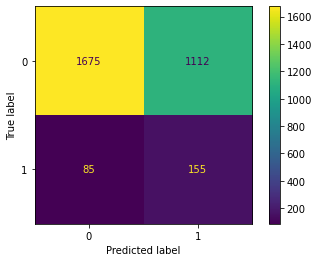

In [119]:
# benchmark prediction - use interested_insurance as the prediction
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_final_sub.target.values, df_final_sub.interested_insurance.values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

score_precision = precision_score(df_final_sub.target.values, \
                                    df_final_sub.interested_insurance.values)
score_recall = recall_score(df_final_sub.target.values, \
                                 df_final_sub.interested_insurance.values)
score_f1 = f1_score(df_final_sub.target.values, \
                                 df_final_sub.interested_insurance.values)
score_f2 = fbeta_score(df_final_sub.target.values, \
                                 df_final_sub.interested_insurance.values, beta=2)

print("Benchmark model results")
print("Precision: %.3f"%(score_precision))
print("Recall: %.3f"%(score_recall))
print("F1: %.3f"%(score_f1))
print("F2: %.3f"%(score_f2))
## Strong recall results from a simple triggered approach, given interested_insurance='Yes'

Benchmark model results
Precision: 0.122
Recall: 0.646
F1: 0.206
F2: 0.348


##### Modelling results

##### Decision Tree result

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [122]:
# create a data set with dummy variables in place of the categorical variables
X = pd.get_dummies(df_final_sub)
y = X.pop("target")

# create initial split to separate test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, stratify=y, random_state= 42
)

# create second split to create the validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size= 0.2, stratify=y_train, random_state= 42
)


In [123]:
X.head()

,age,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,has_married,hours_per_week,capital_gain,capital_loss,...,salary_band_text_adj_foreign_ccy,salary_band_text_adj_£ - range,salary_band_text_adj_£ yearly,salary_band_text_adj_£. per month,salary_band_text_adj_£. pw,workclass_adj_private,workclass_adj_public,workclass_adj_self-emp,workclass_adj_unknown,workclass_adj_wo-pay
0,39,1,17,7,9,0,0,40,2174,0,...,0,0,1,0,0,0,1,0,0,0
1,50,4,17,9,6,1,1,13,0,0,...,0,0,1,0,0,0,0,1,0,0
2,38,12,12,5,4,1,0,40,0,0,...,0,0,0,0,1,1,0,0,0,0
3,53,1,9,9,2,0,1,40,0,0,...,0,0,1,0,0,1,0,0,0,0
4,28,12,17,8,9,1,1,40,0,0,...,0,0,0,1,0,1,0,0,0,0


In [124]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)

print("AUC: %.3f"%(dt_model.score(X_val, y_val)))
print("Precision: %.3f"%(precision_score(y_val, y_pred)))
print("Recall: %.3f"%(recall_score(y_val, y_pred)))
print("F1: %.3f"%(f1_score(y_val, y_pred)))
print("F2: %.3f"%(fbeta_score(y_val, y_pred, beta=2)))

AUC: 0.961
Precision: 0.757
Recall: 0.737
F1: 0.747
F2: 0.741


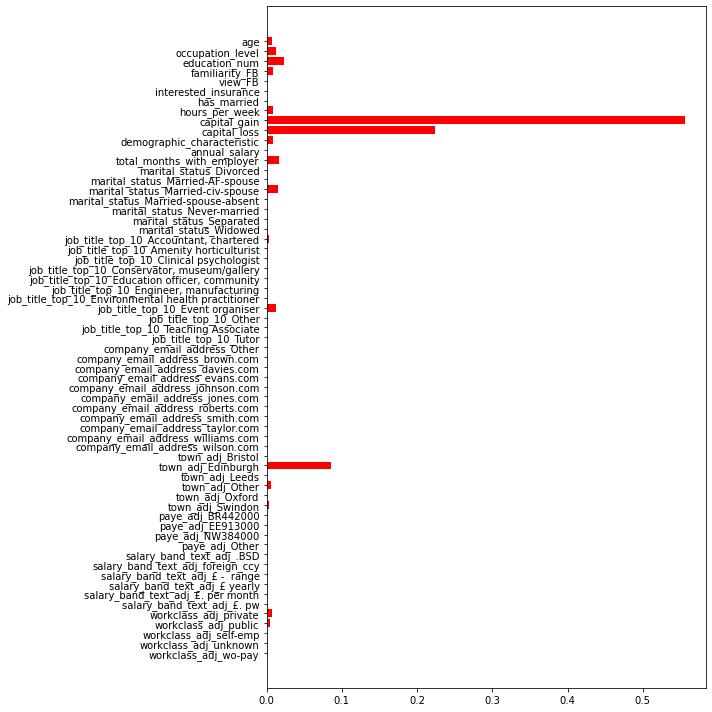

In [125]:
## Plot the feature importances
feat_names = dt_model.feature_names_in_
feat_imp = dt_model.feature_importances_
fig_feat_imp, sub_feat_imp = plt.subplots(figsize=(10, 10))
sub_feat_imp.barh(range(feat_imp.shape[0]), feat_imp, color="r", align="center")
_ = sub_feat_imp.set_yticks(range(feat_imp.shape[0]))
_ = sub_feat_imp.set_yticklabels(np.array(feat_names), rotation=0)
sub_feat_imp.invert_yaxis() 
fig_feat_imp.tight_layout()

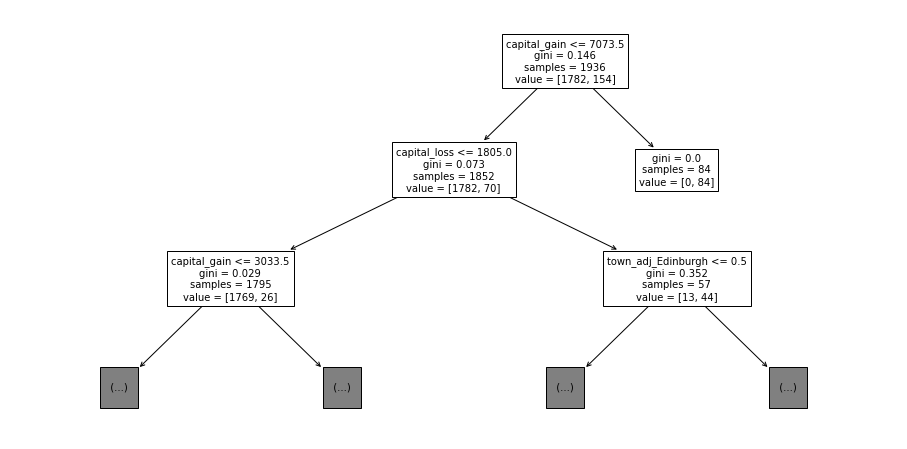

In [126]:
plt.figure(figsize=(16,8))
plot_tree(dt_model, max_depth=2, feature_names=dt_model.feature_names_in_, fontsize=10)
plt.show()

##### RandomForest result

In [127]:
rf_model = RandomForestClassifier()

In [128]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

print("AUC: %.3f"%(rf_model.score(X_val, y_val)))
print("Precision: %.3f"%(precision_score(y_val, y_pred)))
print("Recall: %.3f"%(recall_score(y_val, y_pred)))
print("F1: %.3f"%(f1_score(y_val, y_pred)))
print("F2: %.3f"%(fbeta_score(y_val, y_pred, beta=2)))

AUC: 0.967
Precision: 0.893
Recall: 0.658
F1: 0.758
F2: 0.694


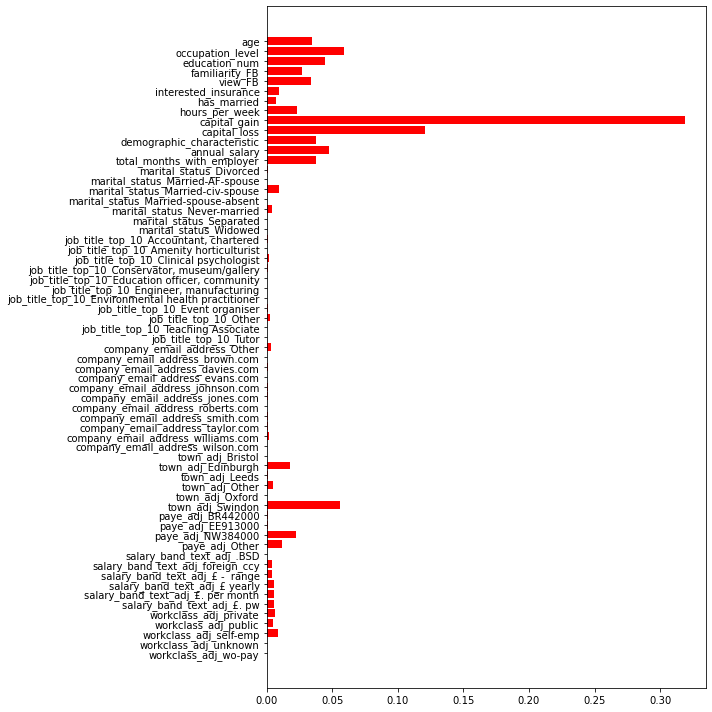

In [129]:
## Plot the feature importances
feat_names = rf_model.feature_names_in_
feat_imp = rf_model.feature_importances_
fig_feat_imp, sub_feat_imp = plt.subplots(figsize=(10, 10))
sub_feat_imp.barh(range(feat_imp.shape[0]), feat_imp, color="r", align="center")
_ = sub_feat_imp.set_yticks(range(feat_imp.shape[0]))
_ = sub_feat_imp.set_yticklabels(np.array(feat_names), rotation=0)
sub_feat_imp.invert_yaxis() 
fig_feat_imp.tight_layout()

#### Findings and modelling adjustments
- features that had a minor contribution
    - company_email
    - job_title
- Modelling results
    - Both approachs considerably outperform the benchmark model
    - DecisionTree vs RandomForest Classifier
        - DT: Better F2+ metric over RF
        - Favour DT
            - given improved interpretability
            - better F2 score, given likely used for marketing where preference for recall over precision

In [130]:
# stop below running
break

SyntaxError: 'break' outside loop (1237712340.py, line 2)

In [ ]:
# Obtain outcodes-to-region lookup via https://www.doogal.co.uk/PostcodeDistricts.php
outcodes = pd.read_csv('../data/Postcode districts.csv')
outcodes = outcodes.drop('Nearby districts', axis=1)
outcodes.head()

In [ ]:
outcodes['town'] = outcodes['Town/Area'].str.split(",",expand=True)[0]
outcodes = outcodes.loc[:,['Postcode', 'town']]
outcodes.columns = ['outcode', 'town']
outcodes.head()

In [ ]:
df_campaigns['outcode'] = df_campaigns.postcode.str.slice(start=0, stop=3)

# Left join the region to campaign data from the outcode
df_campaigns = pd.merge(df_campaigns, outcodes, how='left', on='outcode')

## Whats the frequency of each region
df_campaigns.town.value_counts()

In [ ]:
df_campaigns.loc[:,['last_name', 'region']].agg(['nunique','count'])

In [ ]:
df_mortgage.loc[:,['last_name', 'town']].agg(['nunique','count'])